In [1]:
import spotipy
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.cluster import DBSCAN

In [2]:

#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="af3a4e21d9974f798b0ddef081728f2b",
                                                           client_secret="99a65d20eff04d64bcf24b11824dffc4"))

results = sp.search(q='artist:Linkin Park', limit=50)

# extract the track ids
track_ids = [track['id'] for track in results['tracks']['items']]

# extract the audio features
audio_features = sp.audio_features(track_ids)
audio_features

[{'danceability': 0.556,
  'energy': 0.864,
  'key': 3,
  'loudness': -5.87,
  'mode': 0,
  'speechiness': 0.0584,
  'acousticness': 0.00958,
  'instrumentalness': 0,
  'liveness': 0.209,
  'valence': 0.4,
  'tempo': 105.143,
  'type': 'audio_features',
  'id': '60a0Rd6pjrkxjPbaKzXjfq',
  'uri': 'spotify:track:60a0Rd6pjrkxjPbaKzXjfq',
  'track_href': 'https://api.spotify.com/v1/tracks/60a0Rd6pjrkxjPbaKzXjfq',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/60a0Rd6pjrkxjPbaKzXjfq',
  'duration_ms': 216880,
  'time_signature': 4},
 {'danceability': 0.496,
  'energy': 0.863,
  'key': 9,
  'loudness': -4.153,
  'mode': 1,
  'speechiness': 0.0381,
  'acousticness': 0.0046,
  'instrumentalness': 0,
  'liveness': 0.639,
  'valence': 0.243,
  'tempo': 110.018,
  'type': 'audio_features',
  'id': '2nLtzopw4rPReszdYBJU6h',
  'uri': 'spotify:track:2nLtzopw4rPReszdYBJU6h',
  'track_href': 'https://api.spotify.com/v1/tracks/2nLtzopw4rPReszdYBJU6h',
  'analysis_url': 'https://api.spotif

In [3]:
# store audio features in a dataframe
df = pd.DataFrame(audio_features)
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,audio_features,60a0Rd6pjrkxjPbaKzXjfq,spotify:track:60a0Rd6pjrkxjPbaKzXjfq,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,https://api.spotify.com/v1/audio-analysis/60a0...,216880,4
1,0.496,0.863,9,-4.153,1,0.0381,0.004600,0.000000,0.6390,0.243,110.018,audio_features,2nLtzopw4rPReszdYBJU6h,spotify:track:2nLtzopw4rPReszdYBJU6h,https://api.spotify.com/v1/tracks/2nLtzopw4rPR...,https://api.spotify.com/v1/audio-analysis/2nLt...,185587,4
2,0.492,0.969,9,-4.419,1,0.0491,0.001400,0.000001,0.0787,0.538,95.136,audio_features,3K4HG9evC7dg3N0R9cYqk4,spotify:track:3K4HG9evC7dg3N0R9cYqk4,https://api.spotify.com/v1/tracks/3K4HG9evC7dg...,https://api.spotify.com/v1/audio-analysis/3K4H...,157333,4
3,0.623,0.930,5,-5.285,1,0.0324,0.014100,0.000002,0.1380,0.287,120.119,audio_features,18lR4BzEs7e3qzc0KVkTpU,spotify:track:18lR4BzEs7e3qzc0KVkTpU,https://api.spotify.com/v1/tracks/18lR4BzEs7e3...,https://api.spotify.com/v1/audio-analysis/18lR...,205613,4
4,0.529,0.967,1,-3.647,0,0.0508,0.114000,0.000000,0.6100,0.596,140.127,audio_features,0UFDKFqW2oGspYeYqo9wjA,spotify:track:0UFDKFqW2oGspYeYqo9wjA,https://api.spotify.com/v1/tracks/0UFDKFqW2oGs...,https://api.spotify.com/v1/audio-analysis/0UFD...,166373,4
5,0.554,0.978,4,-3.554,1,0.1310,0.111000,0.000000,0.0731,0.594,135.095,audio_features,4Yf5bqU3NK4kNOypcrLYwU,spotify:track:4Yf5bqU3NK4kNOypcrLYwU,https://api.spotify.com/v1/tracks/4Yf5bqU3NK4k...,https://api.spotify.com/v1/audio-analysis/4Yf5...,162600,4
6,0.524,0.939,9,-3.994,1,0.1130,0.000220,0.000000,0.6230,0.661,150.184,audio_features,1Vej0qeQ3ioKwpI6FUbRv1,spotify:track:1Vej0qeQ3ioKwpI6FUbRv1,https://api.spotify.com/v1/tracks/1Vej0qeQ3ioK...,https://api.spotify.com/v1/audio-analysis/1Vej...,184867,4
7,0.580,0.702,4,-5.565,1,0.0337,0.046600,0.000003,0.5360,0.299,105.076,audio_features,57BrRMwf9LrcmuOsyGilwr,spotify:track:57BrRMwf9LrcmuOsyGilwr,https://api.spotify.com/v1/tracks/57BrRMwf9Lrc...,https://api.spotify.com/v1/audio-analysis/57Br...,208960,4
8,0.451,0.951,1,-3.754,1,0.0645,0.000380,0.000002,0.2610,0.442,162.065,audio_features,3agtg0x11wPvLIWkYR39nZ,spotify:track:3agtg0x11wPvLIWkYR39nZ,https://api.spotify.com/v1/tracks/3agtg0x11wPv...,https://api.spotify.com/v1/audio-analysis/3agt...,213933,4
9,0.596,0.798,0,-4.630,1,0.0285,0.004120,0.000000,0.3380,0.459,105.010,audio_features,373gDROnujxNTFa1FojYIl,spotify:track:373gDROnujxNTFa1FojYIl,https://api.spotify.com/v1/tracks/373gDROnujxN...,https://api.spotify.com/v1/audio-analysis/373g...,199342,4


#### Let's put the same process into a function

In [4]:

def get_audio_features(artist):
    # get tracks from artist
    results = sp.search(q=f'artist:{artist}', limit=50)
    # extract the track ids
    track_ids = [track['id'] for track in results['tracks']['items']]
    song_names = [track['name'] for track in results['tracks']['items']]
    # extract the audio features
    audio_features = sp.audio_features(track_ids)
    # store audio features in a dataframe
    df = pd.DataFrame(audio_features)
    df['artist'] = artist
    df['song_name'] = song_names
    return df

In [5]:
# create loop and select artists you want to get songs from

artists = ['Linkin Park', 'Lady Gaga', 'Backstreet Boys', 'Dua Lipa']

df = pd.DataFrame()

for artist in artists:
    df_artist = get_audio_features(artist)
    df = pd.concat([df, df_artist])
    
df = df.reset_index(drop=True)

In [6]:
df.artist.value_counts()

Linkin Park        50
Lady Gaga          50
Backstreet Boys    50
Dua Lipa           50
Name: artist, dtype: int64

In [7]:
# select the features that we need
x = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# standarize the data
scaler = StandardScaler()
x_prep = scaler.fit_transform(x)




# train and predict
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_prep)
clusters = kmeans.predict(x_prep)

#create new dataframe with title, artist and cluster assigned
scaled_df = pd.DataFrame(x_prep, columns=x.columns)
scaled_df['song_name'] = df['song_name']
scaled_df['artist'] = df['artist']
scaled_df['cluster'] = clusters
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_name,artist,cluster
0,-0.794282,0.659439,-0.779172,-0.438396,-0.782881,0.099992,-0.438356,-0.118423,0.038894,-0.720483,-0.578704,In the End,Linkin Park,2
1,-1.333601,0.652833,0.802903,0.643798,1.277333,-0.536119,-0.469830,-0.118423,2.892425,-1.469197,-0.273737,Numb,Linkin Park,2
2,-1.369556,1.353134,0.802903,0.476143,1.277333,-0.191429,-0.490054,-0.118087,-0.825792,-0.062377,-1.204715,One Step Closer,Linkin Park,2
3,-0.192043,1.095476,-0.251813,-0.069681,1.277333,-0.714731,-0.409789,-0.118005,-0.432270,-1.259367,0.358155,What I've Done,Linkin Park,2
4,-1.036976,1.339920,-1.306530,0.962721,-0.782881,-0.138158,0.221582,-0.118423,2.699978,0.214218,1.609803,Bleed It Out,Linkin Park,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.336028,0.190370,1.330261,0.411854,-0.782881,0.870845,-0.421165,-0.118423,-0.716960,0.610036,0.597813,Don’t Start Now,Dua Lipa,0
196,0.769743,-0.232454,-0.515493,1.096971,-0.782881,1.040057,0.556544,-0.118069,0.967951,-0.400968,-0.086502,Break My Heart,Dua Lipa,0
197,1.057380,-0.424046,0.802903,-0.533568,-0.782881,0.444682,-0.482154,-0.114475,-0.332728,0.271445,0.105361,New Rules,Dua Lipa,0
198,1.057380,-0.424046,0.802903,-0.533568,-0.782881,0.444682,-0.482154,-0.114475,-0.332728,0.271445,0.105361,New Rules,Dua Lipa,0


# Clustering

# Kmeans

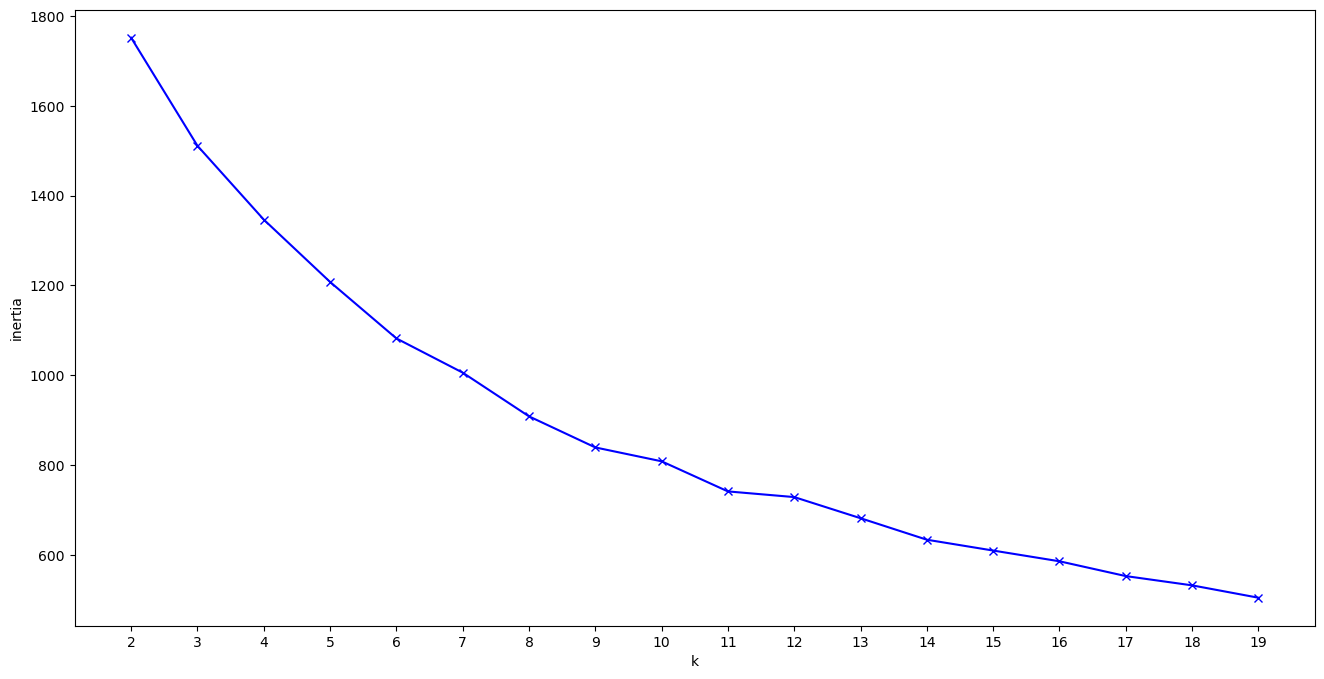

In [8]:
import numpy as np

K = range(2, 20)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(x_prep)
    inertia.append(kmeans.inertia_)

inertia
import matplotlib.pyplot as plt ### ELBOW, the inflexion normally is the best option

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

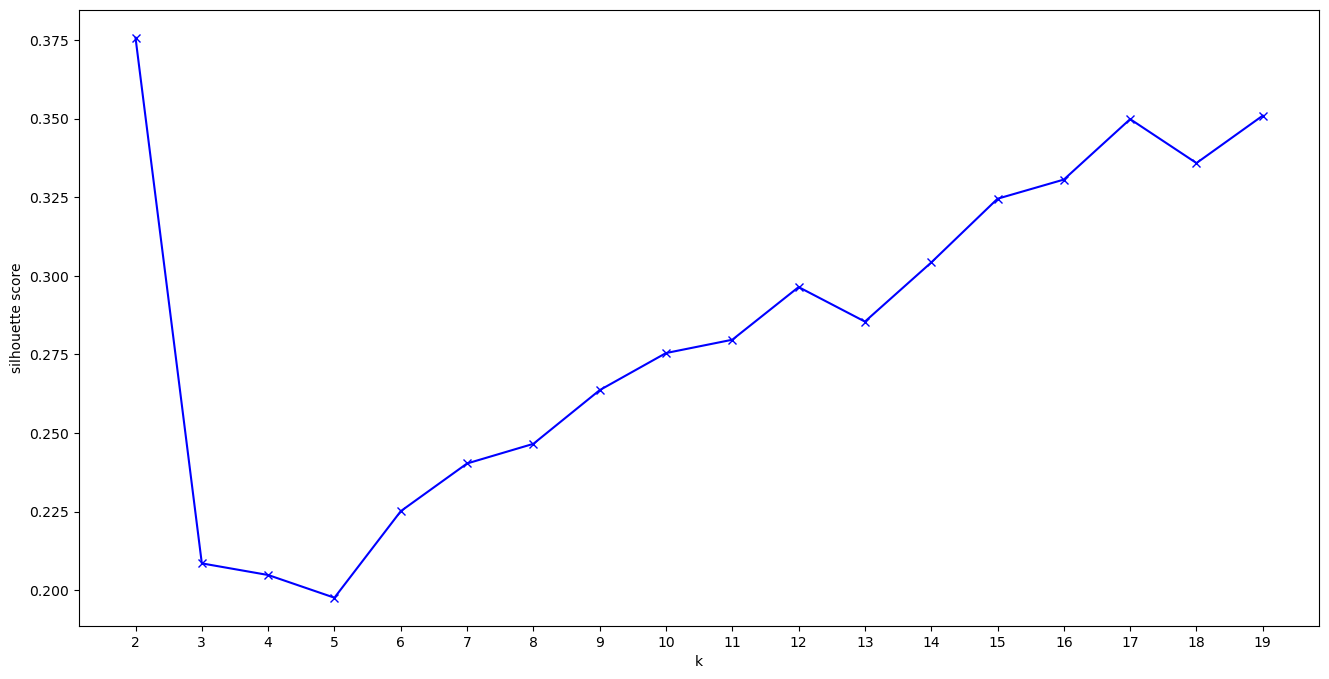

In [9]:
from sklearn.metrics import silhouette_score
K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_prep)
    silhouette.append(silhouette_score(x_prep, kmeans.predict(x_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

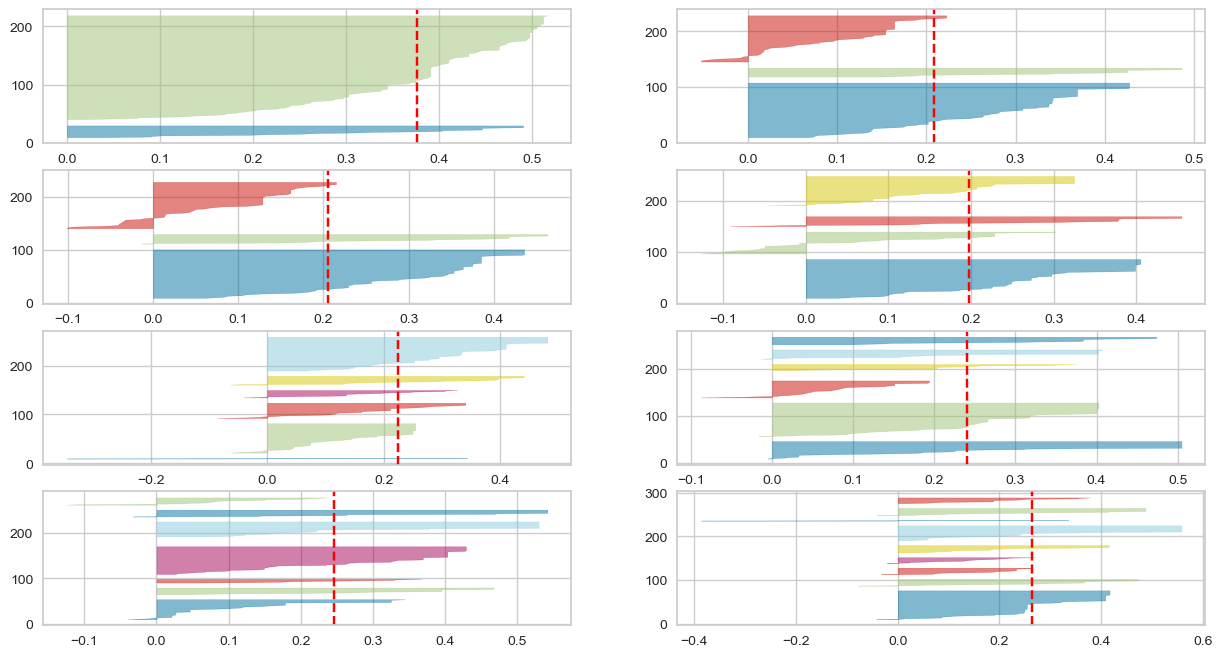

In [10]:
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import pyplot as plt

ffig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7,8,9]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_prep)

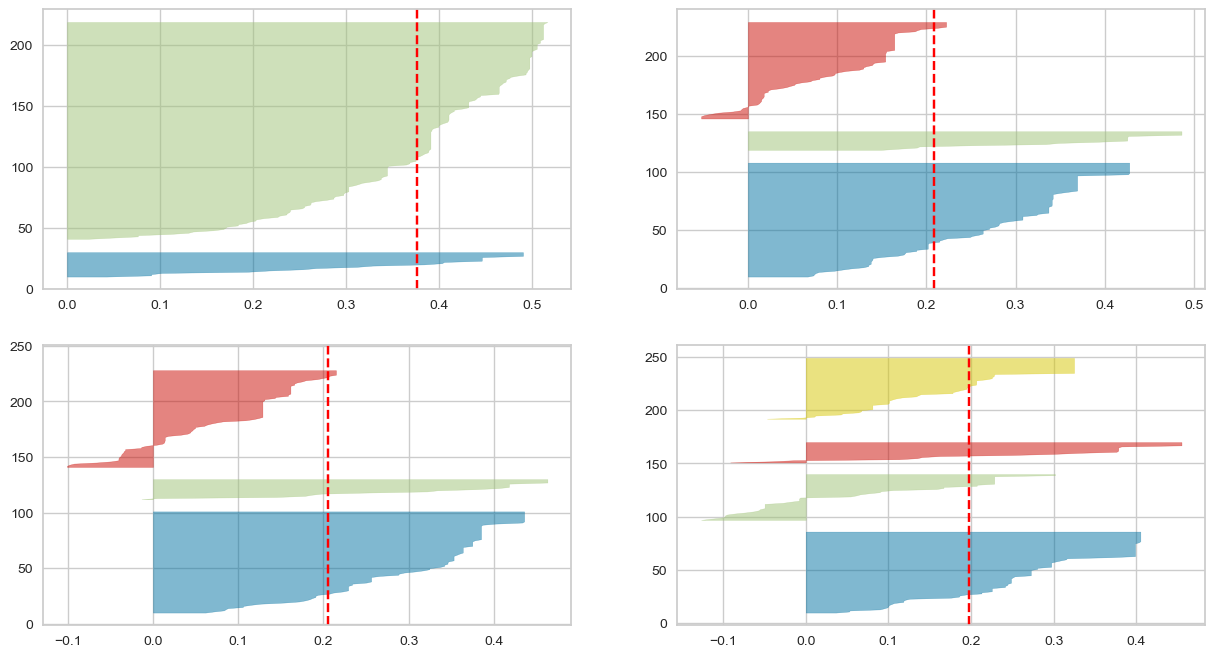

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer
from matplotlib import pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2,3,4,5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x_prep)

We choose k=8 for k means modelling considering both elbow and silhouette methods.

In [52]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_prep)

KMeans(n_clusters=4, random_state=42)

In [53]:
clusters = kmeans.predict(x_prep)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       2, 2, 0, 3, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0,
       2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 2,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

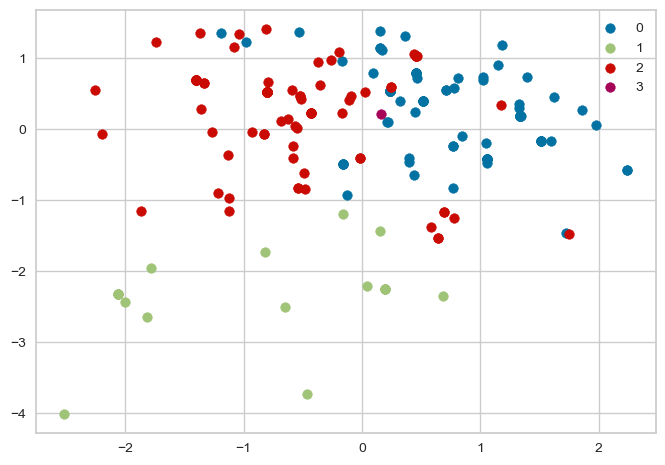

In [54]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(x_prep[clusters == i , 0] , x_prep[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [55]:
score = silhouette_score(x_prep, km.labels_, metric='euclidean') 
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.198


# PCA and Kmeans

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Transform the data into 2D so we can see
pca = PCA(2) 
X_2D = pca.fit_transform(x_prep)
X_2D

array([[ 0.13039581,  0.34272826],
       [ 0.35545236,  3.36009212],
       [-0.2496656 ,  0.69691764],
       [ 0.47336688,  0.88453858],
       [-0.93442189,  2.44351232],
       [-0.92928647,  1.14432245],
       [-1.45175227,  3.58549766],
       [ 1.35570794,  1.84049314],
       [-0.1313824 ,  2.72986442],
       [ 0.65908035,  0.91722405],
       [-1.12036017, -0.83764409],
       [-2.36609134,  1.12795848],
       [-1.79743066,  0.82335806],
       [-1.21467922, -0.05926609],
       [-1.32561101,  3.5998172 ],
       [ 0.08185976, -0.71951986],
       [ 0.65908035,  0.91722405],
       [ 2.92260252,  0.68776865],
       [ 7.05108686, -2.19729766],
       [-1.81560297,  0.92686729],
       [-0.80079557, -0.57310887],
       [-0.15622089,  0.59170496],
       [ 0.32393198, -0.32252488],
       [ 0.32393198, -0.32252488],
       [ 0.32393198, -0.32252488],
       [ 0.32393198, -0.32252488],
       [ 0.32393198, -0.32252488],
       [ 0.00915832,  2.27897075],
       [ 0.00915832,

In [17]:
kmeans = KMeans(n_clusters=4, random_state=42) 
kmeans.fit(X_2D)

KMeans(n_clusters=4, random_state=42)

In [18]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_2D)
clusters

array([3, 2, 3, 3, 2, 0, 2, 2, 2, 3, 0, 0, 0, 0, 2, 3, 3, 1, 1, 0, 0, 3,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2, 2,
       2, 3, 3, 2, 3, 2, 0, 0, 0, 1, 3, 0, 3, 2, 0, 0, 2, 0, 0, 1, 0, 2,
       2, 3, 0, 2, 1, 0, 3, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 1, 3, 1, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3, 0,
       0, 3, 1, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 1, 0, 3, 3, 2, 0, 3,
       3, 1, 2, 0, 2, 3, 2, 1, 1, 1, 0, 2, 3, 0, 2, 1, 1, 3, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

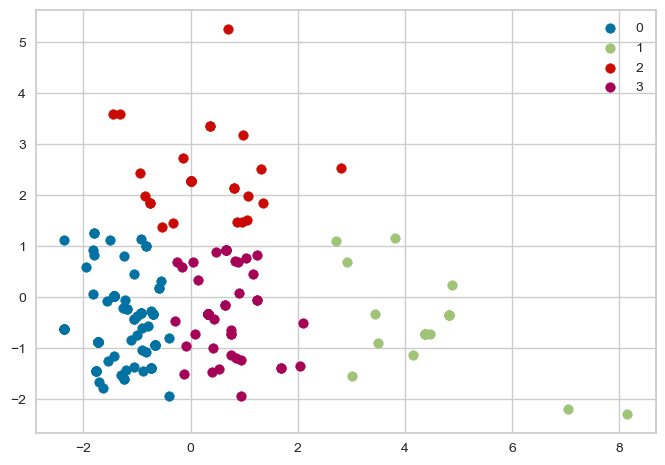

In [19]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [20]:
score = silhouette_score(X_2D, km.labels_, metric='euclidean') 
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.348


Using PCA and Kmeans, the silhouette score increased and the groups seem to be clustered better.

# DBSCAN and PCA

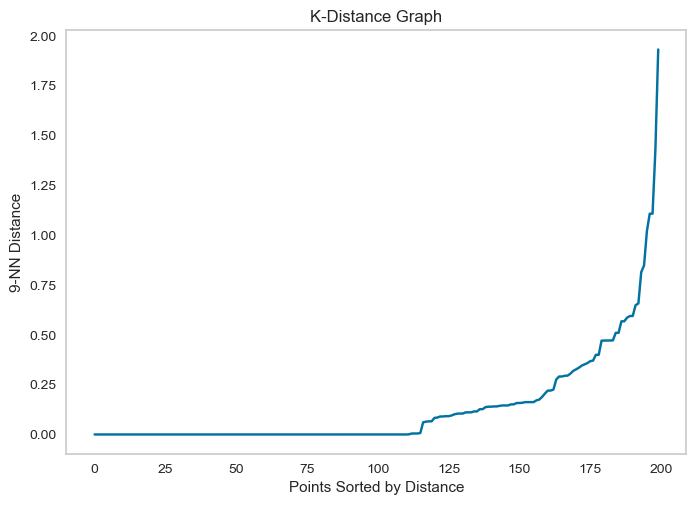

In [21]:
#Using knn to find the optimal k:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 13)
model = knn.fit(X_2D)
distances, indices = knn.kneighbors(X_2D)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances);
plt.xlabel('Points Sorted by Distance')
plt.ylabel('9-NN Distance')
plt.title('K-Distance Graph');

In [22]:
#Fitting the DBSCAN model
db = DBSCAN(eps = 0.6, min_samples = 2).fit(X_2D)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

Number of Clusters :  9
Number of Outliers :  9


In [23]:
label1 = db.labels_ # label -1 means the point is an outlier
label1

array([ 0,  1,  0,  0,  0,  0,  2,  0,  3,  0,  0,  0,  0,  0,  2,  0,  0,
        4, -1,  0,  0,  0,  0,  0,  0,  0,  0,  3,  3,  0,  0,  0,  0,  0,
        3,  0,  3,  0,  0,  0,  0,  0,  3,  3,  3,  0,  0,  3,  0,  1,  0,
        0,  0,  5,  0,  0,  0,  0,  0,  0, -1,  0,  0,  6,  0,  0,  0,  0,
        0, -1,  6,  0,  0,  6,  6,  6,  0,  0,  0,  0,  0,  0,  0,  0,  6,
        0,  0,  0,  0,  0,  0,  6,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  4,  7,  0,  0,  0,  0,  0,
        7,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  6,  5,  0,  0,  7,  0,  0,  6,  6, -1,  0,  0,  8,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  8,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,  8,  8,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

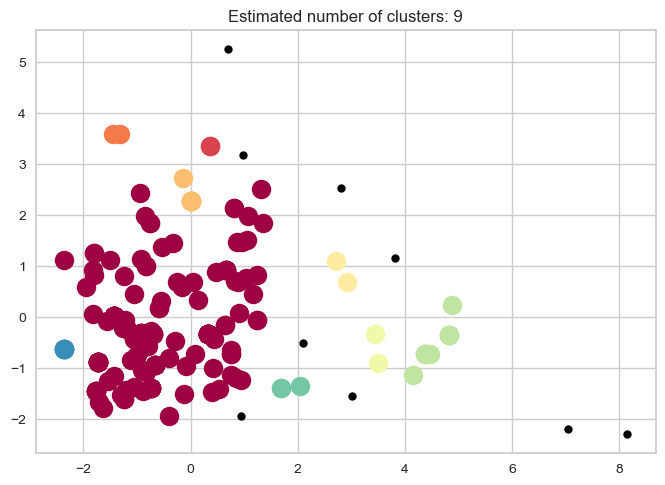

In [24]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    class_member_mask = labels == k

    xy = X_2D[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 14)

    xy = X_2D[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor = "k", markersize = 6)

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [25]:
s = metrics.silhouette_score(X_2D, label1)
s

0.008203630869616596

Silhouette score is very low!

# GaussianMixture and PCA

In [26]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=3, random_state=42, n_init=10)
labels = model.fit_predict(X_2D)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       2, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [27]:
s = metrics.silhouette_score(X_2D, labels)
s

0.4167928729266003

# GaussianMixture without PCA

In [59]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, random_state=42, n_init=10)
labels = model.fit_predict(x_prep)
labels

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 3, 3,
       3, 2, 2, 3, 1, 1, 1, 2, 1, 0, 2, 2, 2, 3, 2, 2, 3, 2, 1, 0, 1, 3,
       1, 3, 2, 3, 0, 1, 1, 0, 0, 0, 3, 2, 3, 3, 2, 2, 1, 2, 0, 1, 1, 2,
       3, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 3, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [60]:
clusters = model.fit_predict(x_prep)
clusters

array([2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 1, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 2, 3, 3,
       3, 2, 2, 3, 1, 1, 1, 2, 1, 0, 2, 2, 2, 3, 2, 2, 3, 2, 1, 0, 1, 3,
       1, 3, 2, 3, 0, 1, 1, 0, 0, 0, 3, 2, 3, 3, 2, 2, 1, 2, 0, 1, 1, 2,
       3, 2, 1, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 3, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2,
       1, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [61]:
s = metrics.silhouette_score(x_prep, clusters)
s

0.2148772900722519

The silhouette score is much better. So, let's continue song recommendation with this algorithm. However, I can't use the PCA for song recommendation as every time, the input will be only one song and with one component, the model can't be used. Thus, only the scaled data will be used. However, in this case, kmeans gave a higher silhouette score

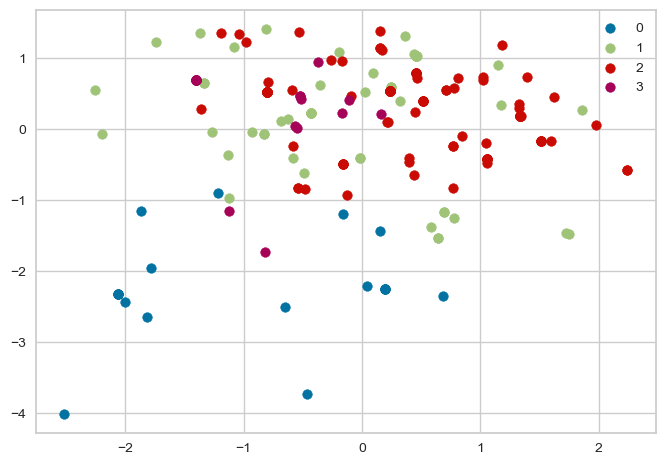

In [62]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(x_prep[clusters == i , 0] , x_prep[clusters == i , 1] , label = i)
plt.legend()
plt.show()

# Song recommendation

**Labeling (clustering) our playlist's dataset**

In [40]:
# select the features that we need
x = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

# standarize the data
scaler = StandardScaler()
x_prep = scaler.fit_transform(x)


# train and predict
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, random_state=42, n_init=10)
clusters = model.fit_predict(x_prep)


#create new dataframe with title, artist and cluster assigned
scaled_df = pd.DataFrame(x_prep, columns=x.columns)
scaled_df['song_name'] = df['song_name']
scaled_df['artist'] = df['artist']
scaled_df['cluster'] = clusters
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,song_name,artist,cluster
0,-0.794282,0.659439,-0.779172,-0.438396,-0.782881,0.099992,-0.438356,-0.118423,0.038894,-0.720483,-0.578704,In the End,Linkin Park,2
1,-1.333601,0.652833,0.802903,0.643798,1.277333,-0.536119,-0.469830,-0.118423,2.892425,-1.469197,-0.273737,Numb,Linkin Park,1
2,-1.369556,1.353134,0.802903,0.476143,1.277333,-0.191429,-0.490054,-0.118087,-0.825792,-0.062377,-1.204715,One Step Closer,Linkin Park,1
3,-0.192043,1.095476,-0.251813,-0.069681,1.277333,-0.714731,-0.409789,-0.118005,-0.432270,-1.259367,0.358155,What I've Done,Linkin Park,1
4,-1.036976,1.339920,-1.306530,0.962721,-0.782881,-0.138158,0.221582,-0.118423,2.699978,0.214218,1.609803,Bleed It Out,Linkin Park,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.336028,0.190370,1.330261,0.411854,-0.782881,0.870845,-0.421165,-0.118423,-0.716960,0.610036,0.597813,Don’t Start Now,Dua Lipa,2
196,0.769743,-0.232454,-0.515493,1.096971,-0.782881,1.040057,0.556544,-0.118069,0.967951,-0.400968,-0.086502,Break My Heart,Dua Lipa,2
197,1.057380,-0.424046,0.802903,-0.533568,-0.782881,0.444682,-0.482154,-0.114475,-0.332728,0.271445,0.105361,New Rules,Dua Lipa,2
198,1.057380,-0.424046,0.802903,-0.533568,-0.782881,0.444682,-0.482154,-0.114475,-0.332728,0.271445,0.105361,New Rules,Dua Lipa,2


**Kmeans**

In [56]:

song_name = input('Choose a song: ')

# searching for the song in spotipy and getting the audio features
results = sp.search(q=f'track:{song_name}', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)

# converting it into a dataframe
df_ = pd.DataFrame(audio_features)
new_features = df_[x.columns]

# scaling the audio features
scaled_x = scaler.transform(new_features)



# train and predict
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(x_prep)
cluster = kmeans.predict(scaled_x)

#take another close song in the same cluster to recommend
filtered_df = scaled_df[scaled_df['cluster'] == cluster[0]][x.columns]
closest, _ = pairwise_distances_argmin_min(scaled_x, filtered_df)
scaled_df.loc[closest[0]]['song_name'], scaled_df.loc[closest[0]]['artist']

Choose a song: Numb


('In the End', 'Linkin Park')

**GaussianMixture**

In [57]:
song_name = input('Choose a song: ')

# searching for the song in spotipy and getting the audio features
results = sp.search(q=f'track:{song_name}', limit=1)
track_id = results['tracks']['items'][0]['id']
audio_features = sp.audio_features(track_id)

# converting it into a dataframe
df_ = pd.DataFrame(audio_features)
new_features = df_[x.columns]

# scaling the audio features
scaled_x = scaler.transform(new_features)



# train and predict 
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, random_state=42, n_init=10)
model.fit(x_prep)
cluster = model.predict(scaled_x)

#take another close song in the same cluster to recommend
filtered_df = scaled_df[scaled_df['cluster'] == cluster[0]][x.columns]
closest, _ = pairwise_distances_argmin_min(scaled_x, filtered_df)
scaled_df.loc[closest[0]]['song_name'], scaled_df.loc[closest[0]]['artist']

Choose a song: Numb


('In the End', 'Linkin Park')